In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Acquire the Data

In [2]:
df = pd.read_csv('allservicecalls.csv')

In [3]:
df.shape

(495440, 17)

___

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              495440 non-null  object 
 1   CASEID                495440 non-null  int64  
 2   OPENEDDATETIME        495440 non-null  object 
 3   SLA_Date              481300 non-null  object 
 4   CLOSEDDATETIME        441387 non-null  object 
 5   Late (Yes/No)         495440 non-null  object 
 6   Dept                  445141 non-null  object 
 7   REASONNAME            495440 non-null  object 
 8   TYPENAME              495440 non-null  object 
 9   CaseStatus            495440 non-null  object 
 10  SourceID              495440 non-null  object 
 11  OBJECTDESC            495440 non-null  object 
 12  Council District      495440 non-null  int64  
 13  XCOORD                495345 non-null  float64
 14  YCOORD                495345 non-null  float64
 15  

## Takeaways:
- most of the features we have are are objects 
    - I think they may mostly be categories
- I see that there are going to be a few nulls in some of these features

___

In [5]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
dtype: int64

## Takeaways:
- The following features contain null values
    - SLA_Date
    - CLOSEDDATETIME
    - Dept
    - XCOORD
    - YCOORD
- SLA_Date
    - I feel that there are too many to drop but I would like to look further
        - If we were to decide to drop these nulls we would be dropping 2.85% of our observations
            - Hypothetically leaving us with 481,300 observations if we only dropped this column
- CLOSEDDATETIME
    - I feel as if there are far to many observations here to drop
        - But I dont know how we would fill these null valiies
            - If we dropped these nulls we would be dropping 10.91% of our observations
                - this would leave us with 441,386 observations if we dropped ONLY this column
- Dept
    - I think this is again too many to drop, it makes up for 10.15% of our observations
        - We could just fill this with "Unknown"
- XCOORD
    - I would feel safe droping these null values
        - only 0.02% of the observations
- YCOORD
    - I would feel safe droping these null values
        - only 0.02% of the observations
            - probaby the same ones as XCOORD

___

## Department Data Info

In [6]:
df.Dept.value_counts()

Solid Waste Management       190658
Development Services         132826
Animal Care Services          75222
Trans & Cap Improvements      33684
Code Enforcement Services      5294
Customer Service               4196
Metro Health                   2827
Parks and Recreation            433
City Council                      1
Name: Dept, dtype: int64

In [7]:
#plt.figure(figsize=(16,8))
#sns.set(style="dark")
#sns.histplot(df.Dept)
#plt.xticks(rotation=90)
#plt.show()

## Takeaways:
- Why is city council so low?
- is city council the reason that Dept has so many null values?

___

## Category Data Info

In [8]:
df.Category.value_counts()

No Category                  415187
Solid Waste Services          63005
Property Maintenance           5212
Animals                        4754
Information                    4197
Scooters                       1008
Graffiti                        820
Parks                           496
Traffic Signals and Signs       438
Streets & Infrastructure        315
Historic Preservation             8
Name: Category, dtype: int64

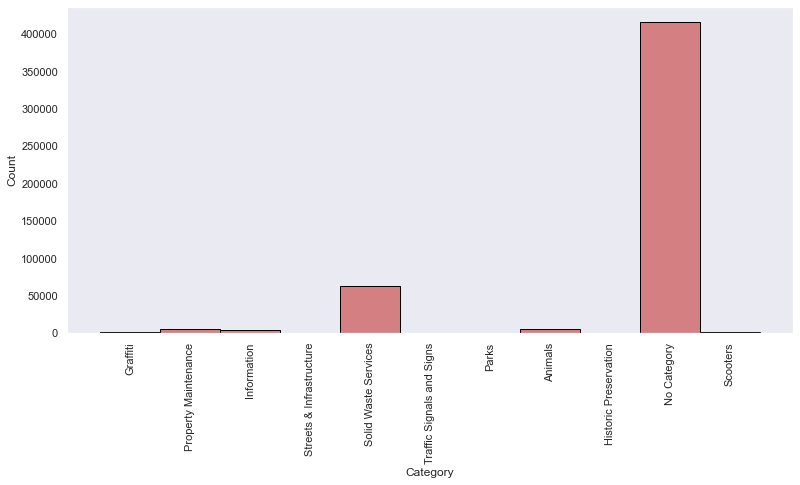

In [9]:
plt.figure(figsize=(13,6))
sns.set(style="dark")
sns.histplot(df.Category, color='indianred', edgecolor='black')
plt.xticks(rotation=90)
plt.show()

## Takeaways:
- There are a lot of calls that have gone uncategorized.
    - What is No Category?
        - what kind of calls get put into this category?
            - Maybe worth researching
- I guess no one cares about history

___

## Late Data Info

In [10]:
df['Late (Yes/No)'].value_counts()

NO     400740
YES     94700
Name: Late (Yes/No), dtype: int64

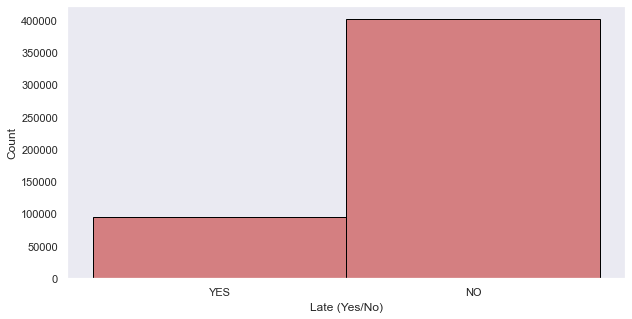

In [11]:
plt.figure(figsize=(10,5))
sns.set(style="dark")
sns.histplot(df['Late (Yes/No)'], color='indianred', edgecolor='black')
plt.show()

## Takeaways:
- We should rename 'Late (Yes/No)' to just 'Late' to make coding easier
- 80.89% of calls have been closed
- 19.11% have not been closed
    - What is causing these to not be closed?
    - how long have they been open?

___

## Reason Name Data Info

In [12]:
df.REASONNAME.value_counts()

Waste Collection                 152898
Code Enforcement                 136050
Field Operations                  75100
Miscellaneous                     30407
Traffic Operations                26148
Streets                           25816
Trades                             9590
Stormwater                         6797
Small Business                     6106
Solid Waste                        5261
Workforce Development              5250
Customer Service                   4650
311 Call Center                    4196
Food Establishments                1610
Land Development                   1094
Facility License                    908
Clean and Green                     758
Dangerous Premise                   701
Shops (Internal)                    385
Vector                              243
Historic Preservation               224
Signals                             223
Urban Forestry                      209
Traffic Engineering Design          206
Graffiti (IntExp)                   112


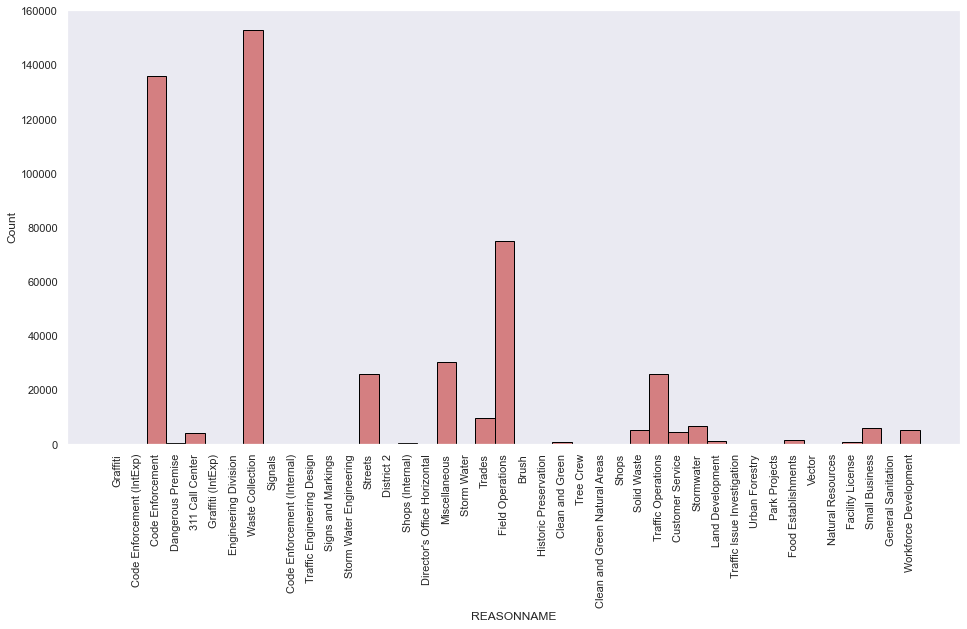

In [13]:
plt.figure(figsize=(16,8))
sns.set(style="dark")
sns.histplot(df.REASONNAME, color='indianred', edgecolor='black')
plt.xticks(rotation=90)
plt.show()

## Takeaways:
- Maybe we could amke this easier to manage and combine some of these?
    - Waste Collection + Solid Waste
        - Into just 'Waste Management'
    - Storm Water + Storm Water Engineering + Stormwater 
        - Into 'Storm Water Managemnt'
    - Ect.

___

## Case Status Data Info

In [14]:
df.CaseStatus.value_counts()

Closed    441387
Open       54053
Name: CaseStatus, dtype: int64

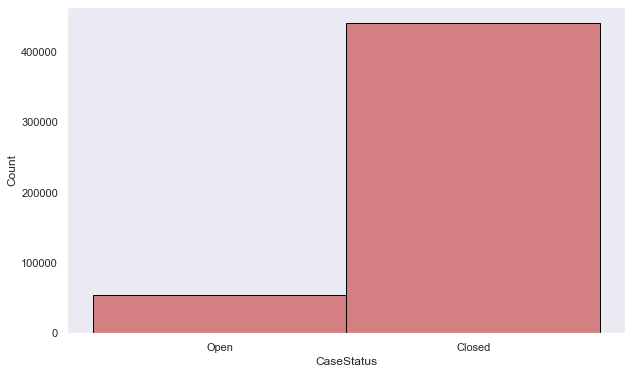

In [15]:
plt.figure(figsize=(10,6))
sns.set(style="dark")
sns.histplot(df.CaseStatus, color='indianred', edgecolor='black')
plt.show()

## Takeaways:
- 89.09% of cases are closed
- 10.91% are open

___

## Source Data Info

In [16]:
df.SourceID.value_counts()

Web Portal                    395339
311 Mobile App                 55306
Constituent Call               41340
Internal Services Requests      3455
Name: SourceID, dtype: int64

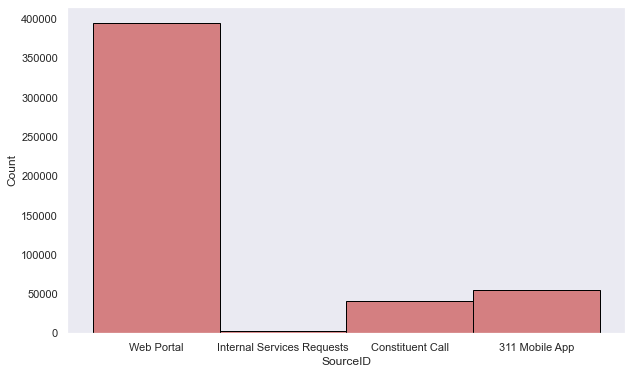

In [17]:
plt.figure(figsize=(10,6))
sns.set(style="dark")
sns.histplot(df.SourceID, color='indianred', edgecolor='black')
plt.show()

## Takeaways:
- More people tend to use the Web Portal to report issues.
- Is there a possible link to which form of reporting is responded to quickest and slowest?

___

## Council District Data Info

In [18]:
df['Council District'].value_counts()

5     67022
1     66543
2     65327
3     62330
4     46830
7     46377
6     42719
10    40062
8     27924
9     27473
0      2833
Name: Council District, dtype: int64

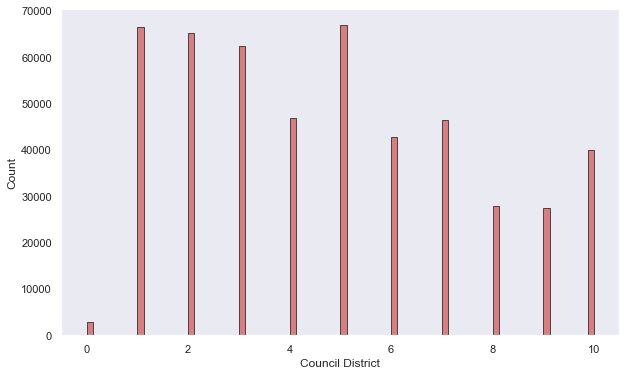

In [19]:
plt.figure(figsize=(10,6))
sns.set(style="dark")
sns.histplot(df['Council District'], color='indianred', edgecolor='black')
plt.show()

## Takeaways:
- Districts 1, 2, 3, & 5 have higher reports
- District 0 has nearly no reports in comparison to the others
- 4, 6, 7, 8, 9, & 10 still have many reports but not as much as 1, 2, 3, and 5

___

## More info on my reasoning
- I didnt look at the following features in depth
    - Opened date and time
    - sla date
    - closed date time
    - type name
    - object decription
    - x and y cordinates
    - report start and end dates
- The reason I didnt make univaraites for these is because There were so many different itterations that it became unruley

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              495440 non-null  object 
 1   CASEID                495440 non-null  int64  
 2   OPENEDDATETIME        495440 non-null  object 
 3   SLA_Date              481300 non-null  object 
 4   CLOSEDDATETIME        441387 non-null  object 
 5   Late (Yes/No)         495440 non-null  object 
 6   Dept                  445141 non-null  object 
 7   REASONNAME            495440 non-null  object 
 8   TYPENAME              495440 non-null  object 
 9   CaseStatus            495440 non-null  object 
 10  SourceID              495440 non-null  object 
 11  OBJECTDESC            495440 non-null  object 
 12  Council District      495440 non-null  int64  
 13  XCOORD                495345 non-null  float64
 14  YCOORD                495345 non-null  float64
 15  

___

# What Do We Want to do as a Team?
- Drop SLA Date Nulls
    - We are led to belive that these were calls that a case was never created or someone calling that is not in their jurisdiction.
- Make reason type easier to manage by combining some of the reasons?
    - Waste Collection + Solid Waste
        - Into just 'Waste Management'
    - Storm Water + Storm Water Engineering + Stormwater 
        - Into 'Storm Water Managemnt'
    - Ect.
- Change column names to make it easier to read
- Drop category due to overweling amount of non cateogrized
- Setting case id as index
- Drop start and end year due to unhelpfulness
- Change case status to case open as a bool 1 for yes 0 for no
- Rename
    - 'Late (Yes/No) to just 'late'
    - SLA_date to 'due_date'
    - everything gabby did
    - XCOORD to 'latitude'
    - YCOORD to 'longitude'
- Replace Dept null values with "Unknown"
    - for now
- Drop nulls in X and Y coord
    - only makes up for 0.02% of our observations
        - they will not be missed
- Make a new feature 'days open"
    - hold how long the case was open for
- Make a new feature for 'level of delay'
    - based on days open
        - unresolved
        - resolved very early
        - resolved early
        - resolved on time
        - resolved late
        - resolved very late

### Lori's Funcitons
- Drop category due to overweling amount of non cateogrized
- Setting case id as index
- Drop start and end year due to unhelpfulness

### John Funcitons
- Make reason type easier to manage by combining some of the reasons?
    - Waste Collection + Solid Waste
        - Into just 'Waste Management'
    - Storm Water + Storm Water Engineering + Stormwater 
        - Into 'Storm Water Managemnt'
    - Ect.

### Sam Functions
- Drop SLA Date Nulls
    - We are led to belive that these were calls that a case was never created or someone calling that is not in their jurisdiction.
- Replace Dept null values with "Unknown"
- Drop nulls in X and Y coord
    - only makes up for 0.02% of our observations
        - they will not be missed

### Gabby Funcitons
- Rename
    - 'Late (Yes/No) to just 'late'
    - SLA_date to 'due_date'
    - everything gabby did
    - YCOORD to 'latitude'
    - XCOORD to 'longitude'

### Caitlyn Fucntions
- Make a new feature 'days open"
    - hold how long the case was open for
- Make a new feature for 'level of delay'
    - based on days open
        - unresolved
        - resolved very early
        - resolved early
        - resolved on time
        - resolved late
        - resolved very late

When is a case create?
How do you categorize the cases?
